In [83]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

import tensorflow as tf
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [84]:

# carregar dados do arquivo CSV
df = pd.read_csv('dataset/mnist_train.csv')

# extrair coluna de rótulos (labels)
y = df['label'].values

# extrair colunas de pixels e convertê-los em arrays de imagem
x = df.iloc[:, 1:].values.reshape(df.shape[0], 28, 28, 1)

# normalizar valores dos pixels para [0,1]
x = x.astype('float32')
x /= 255

# converter rótulos em vetores de classes binárias
y = to_categorical(y, 10)


In [85]:

# definir modelo
model = Sequential()

# primeira camada convolucional com 32 filtros de tamanho 3x3
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# segunda camada convolucional com 64 filtros de tamanho 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))

# camada de max pooling com tamanho de janela 2x2
model.add(MaxPooling2D((2, 2)))

# camada de dropout para evitar overfitting
model.add(Dropout(0.25))

# camada de achatamento para converter a saída em um vetor 1D
model.add(Flatten())

# camada densa com 128 neurônios e função de ativação ReLU
model.add(Dense(128, activation='relu'))

# camada de dropout para evitar overfitting
model.add(Dropout(0.5))

# camada de saída com 10 neurônios (1 para cada dígito)
# e função de ativação softmax para obter uma distribuição de probabilidade
model.add(Dense(10, activation='softmax'))

# compilar modelo com função de perda categorical cross-entropy,
# otimizador Adam e métrica de acurácia
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [86]:

# compilar modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [87]:

# treinar modelo
model.fit(x, y,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_split=0.2)

# salvar modelo treinado
model.save('mnist_model.h5')

Epoch 1/10


2023-05-18 14:48:17.495434: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


  2/375 [..............................] - ETA: 29s - loss: 2.2810 - accuracy: 0.1719 

2023-05-18 14:48:18.170343: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18874368 exceeds 10% of free system memory.
2023-05-18 14:48:18.212518: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18874368 exceeds 10% of free system memory.
2023-05-18 14:48:18.224966: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23887872 exceeds 10% of free system memory.


375/375 [==============================] - 38s 99ms/step - loss: 0.2627 - accuracy: 0.9200 - val_loss: 0.0639 - val_accuracy: 0.9819
Epoch 2/10
375/375 [==============================] - 40s 107ms/step - loss: 0.0929 - accuracy: 0.9721 - val_loss: 0.0540 - val_accuracy: 0.9857
Epoch 3/10
375/375 [==============================] - 38s 102ms/step - loss: 0.0681 - accuracy: 0.9787 - val_loss: 0.0471 - val_accuracy: 0.9868
Epoch 4/10
375/375 [==============================] - 39s 104ms/step - loss: 0.0575 - accuracy: 0.9827 - val_loss: 0.0411 - val_accuracy: 0.9882
Epoch 5/10
375/375 [==============================] - 38s 103ms/step - loss: 0.0462 - accuracy: 0.9858 - val_loss: 0.0376 - val_accuracy: 0.9890
Epoch 6/10
375/375 [==============================] - 39s 103ms/step - loss: 0.0438 - accuracy: 0.9862 - val_loss: 0.0364 - val_accuracy: 0.9902
Epoch 7/10
375/375 [==============================] - 39s 104ms/step - loss: 0.0366 - accuracy: 0.9881 - val_loss: 0.0355 - val_accuracy: 0.98

In [88]:
from tensorflow.keras.models import load_model

# carregar dados de teste do arquivo CSV
df_test = pd.read_csv('dataset/mnist_test.csv')

# extrair colunas de pixels e remover a primeira coluna de rótulos
x_test = df_test.iloc[:, 1:].values

# normalizar valores dos pixels para [0,1] e redimensionar para o formato esperado pelo modelo
x_test = x_test.astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1)

# carregar modelo treinado
model = load_model('mnist_model.h5')

# extrair coluna de rótulos e converter para array numpy
y_test = df_test.iloc[:, 0].values

# avaliar modelo nos dados de teste
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# imprimir acurácia
acc = np.mean(y_pred == y_test)
print('Test accuracy:', acc)

313/313 [==============================] - 2s 5ms/step
Test accuracy: 0.99


1/1 [==============================] - 0s 16ms/step
Previsões: [3, 3, 2, 3, 4, 5, 6, 3, 2, 5]


<Figure size 640x480 with 0 Axes>

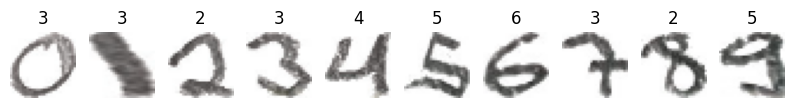

In [95]:
import cv2
import matplotlib.pyplot as plt

def recortar_numeros(imagem):
    # Carregar a imagem
    img = cv2.imread(imagem)

    # Converter a imagem para escala de cinza
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Binarizar a imagem usando um valor de limiar adequado
    _, img_thresh = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV)

    # Encontrar contornos dos objetos na imagem binarizada
    contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Criar uma lista para armazenar as informações dos contornos
    contornos = []

    # Iterar sobre os contornos encontrados
    for contour in contours:
        # Obter o retângulo delimitador do contorno
        (x, y, w, h) = cv2.boundingRect(contour)

        # Adicionar as informações do contorno à lista
        contornos.append((x, y, w, h))

    # Ordenar os contornos com base na coordenada x
    contornos = sorted(contornos, key=lambda c: c[0])

    # Criar uma lista para armazenar as imagens recortadas dos números
    numeros_recortados = []

    # Recortar os números da imagem original na ordem correta
    for (x, y, w, h) in contornos:
        numero_recortado = img[y:y+h, x:x+w]
        numero_redimensionado = cv2.resize(numero_recortado, (28, 28))
        numeros_recortados.append(numero_redimensionado)

    return numeros_recortados

# Caminho da imagem com os números
# caminho_imagem = 'numeros_manuscrito.jpg'
caminho_imagem = 'numeros.jpeg'

# Chamar a função para recortar os números da imagem
numeros_recortados = recortar_numeros(caminho_imagem)

# Exibir os números recortados usando matplotlib
fig = plt.figure()


# Preprocessar as imagens recortadas e fazer as previsões com o modelo
previsoes = []
for numero in numeros_recortados:
    # Redimensionar o número para o tamanho esperado pelo modelo
    numero_redimensionado = cv2.resize(numero, (28, 28))

    # Converter o número para escala de cinza
    numero_redimensionado_gray = cv2.cvtColor(numero_redimensionado, cv2.COLOR_BGR2GRAY)

    # Binarizar o número usando um valor de limiar adequado
    _, numero_thresh = cv2.threshold(numero_redimensionado_gray, 200, 255, cv2.THRESH_BINARY_INV)

    # Expandir as dimensões do número para o formato esperado pelo modelo
    numero_expandido = np.expand_dims(numero_thresh, axis=-1)
    numero_expandido = np.expand_dims(numero_expandido, axis=0)

    # Fazer a previsão com o modelo
    previsao = model.predict(numero_expandido)
    previsao = np.argmax(previsao)
    previsoes.append(previsao)

# Imprimir as previsões
print('Previsões:', previsoes)

# Exibir as imagens recortadas
fig, axs = plt.subplots(1, len(numeros_recortados), figsize=(10, 2))
for i, numero in enumerate(numeros_recortados):
    axs[i].imshow(numero, cmap='gray')
    axs[i].set_title('{}'.format(previsoes[i]))
    axs[i].axis('off')
plt.show()

# for i, numero_recortado in enumerate(numeros_recortados):
#     ax = fig.add_subplot(1, len(numeros_recortados), i+1)
#     ax.imshow(cv2.cvtColor(numero_recortado, cv2.COLOR_BGR2RGB))
#     ax.axis('off')
